## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: [Enter Student 1 Name Here]  
   **ID**: `9XXXXXX` 

2. **Name**: [Enter Student 2 Name Here]  
   **ID**: `9XXXXXX` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities or post on the classroom.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!





## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the project requirements and are properly documented in your submission.


## Maximum Likelihood Estimator (MLE) Classifier
The Maximum Likelihood Estimator (MLE) is a fundamental statistical approach used to infer the parameters of a given distribution that are most likely to result in the observed data. In the context of image classification, MLE helps to quantify the probability of observing the data within each predefined class based on their distinct statistical properties. This method is highly effective for classifying images into categories by comparing the likelihoods of the data under different model parameters, enabling the most probable class assignment.

1. **Calculate Class Priors**: Estimate the probability of each class based on the training dataset. This is expressed as:
   $$
   P(C_k) = \frac{N_k}{N}
   $$
   where \(N_k\) is the number of samples of class \(k\) and \(N\) is the total number of samples.

2. **Estimate Class-specific Parameters**: For each class, estimate parameters such as the mean \(\mu_k\) and covariance \(\Sigma_k\) of features that describe the distribution of the data:
   $$
   \mu_k = \frac{1}{N_k} \sum_{x \in C_k} x
   $$
   $$
   \Sigma_k = \frac{1}{N_k} \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
   $$

3. **Compute Likelihoods**: For a given test instance \(x\), compute the likelihood of that instance belonging to each class using the estimated parameters:
   $$
   p(x | C_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
   $$

4. **Classify Based on Maximum Likelihood**: Assign the class label to each test instance based on the highest likelihood, which can be calculated as:
   $$
   \hat{y} = \arg\max_{k} P(C_k) \cdot p(x | C_k)
   $$

The Naive Bayes classifier is perhaps the most well-known application of the Maximum Likelihood Estimator principle in classification tasks. It assumes that the features in each class are independent, simplifying the computation of likelihoods. While Naive Bayes is popular for its simplicity and efficiency, it is not the only technique that leverages the MLE approach. Other classical alternatives include Logistic Regression, which applies MLE to estimate the parameters that best predict categorical outcomes, and Gaussian Mixture Models, which use MLE to estimate the parameters of multiple Gaussian distributions within the data. Students are encouraged to explore these models to gain a deeper understanding of statistical estimation techniques.


## Req- Image Classification for EuroSATallBands
Image classification is a key challenge in satellite imaging and remote sensing. As discussed in the lecture, this task is typically conducted on a pixel-wise basis because a single image can contain multiple textural elements of different celestial features. However, for this specific assignment, we will focus on identifying the dominant phenomena in the image as the basis for classification.

- **Load the Images**: Load the images of the EuroSAT dataset that belong to the **residential**, **river**, and **forest** classes.

- **Split the Dataset**: Split the dataset such that 10% of each class is used as testing data, and the remainder is used for training your classifier. Use the indices provided by `np.random.choice` with seed set to `27`. **Code is provided do not change it**.

- **Feature Extraction**: Extract suitable features from the images that you think might be relevant in distinguishing each class from the others. Keep in mind the curse of dimensionality when selecting features.

- **Implement a Maximum Likelihood Estimator (MLE)**: Implement a Maximum Likelihood Estimator (MLE) based on your training data. 
- **Report Accuracy and Average F1 Score**: After testing your classifier on the test set, report the **Accuracy** and **Average F1 Score** of your model.


In [1]:
# Add your libraries here
import numpy as np
import cv2
import os
from skimage import io
import rasterio
import matplotlib.pyplot as plt


In [2]:
# DO NOT CHANGE THIS CELL
## Training set indices.
np.random.seed(27)  # Set random seed for reproducibility

# Randomly select indices for the test sets for each class
residential_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
forest_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
river_test_indices = np.random.choice(np.arange(2500), size=250, replace=False)


### Step(1) Load Images

In [3]:
def load_raster_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        with rasterio.open(filepath) as src:
            img = src.read()
            # Check if the image has multiple bands
            if len(img.shape) == 3:  # If it's a multi-band image
                # Reshape the image to (bands, height, width)
                img = np.moveaxis(img, 0, -1)

            images.append(img)
    # Convert list of arrays to a single 3D array
    images = np.stack(images)
    return images  # no,w,h,c

residential_images = load_raster_images_from_folder('./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif/Residential')
print("Residential images shape: ", residential_images.shape)

forest_images = load_raster_images_from_folder('./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif/Forest')
print("Forest images shape: ", forest_images.shape)

river_images = load_raster_images_from_folder('./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif/River')
print("River images shape: ", river_images.shape)


Residential images shape:  (3000, 64, 64, 13)
Forest images shape:  (3000, 64, 64, 13)
River images shape:  (2500, 64, 64, 13)


In [4]:
# Determine the number of bands
num_bands = residential_images.shape[-1]

### Step(2) Split Data into Train & Test

In [5]:
mask=np.zeros(len(residential_images),dtype=bool)
mask[residential_test_indices]=True
residential_images_train=residential_images[~ mask]
residential_images_test=residential_images[mask]
print("Residential train images shape: ", residential_images_train.shape)
print("Residential test images shape: ", residential_images_test.shape)

mask=np.zeros(len(forest_images),dtype=bool)
mask[forest_test_indices]=True
forest_images_train=forest_images[~ mask]
forest_images_test=forest_images[mask]
print("Forest train images shape: ", forest_images_train.shape)
print("Forest test images shape: ", forest_images_test.shape)

mask=np.zeros(len(river_images),dtype=bool)
mask[river_test_indices]=True
river_images_train=river_images[~mask]
river_images_test=river_images[mask]
print("River train images shape: ", river_images_train.shape)
print("River test images shape: ", river_images_test.shape)



Residential train images shape:  (2700, 64, 64, 13)
Residential test images shape:  (300, 64, 64, 13)
Forest train images shape:  (2700, 64, 64, 13)
Forest test images shape:  (300, 64, 64, 13)
River train images shape:  (2250, 64, 64, 13)
River test images shape:  (250, 64, 64, 13)


### Step(3) Feature Extraction

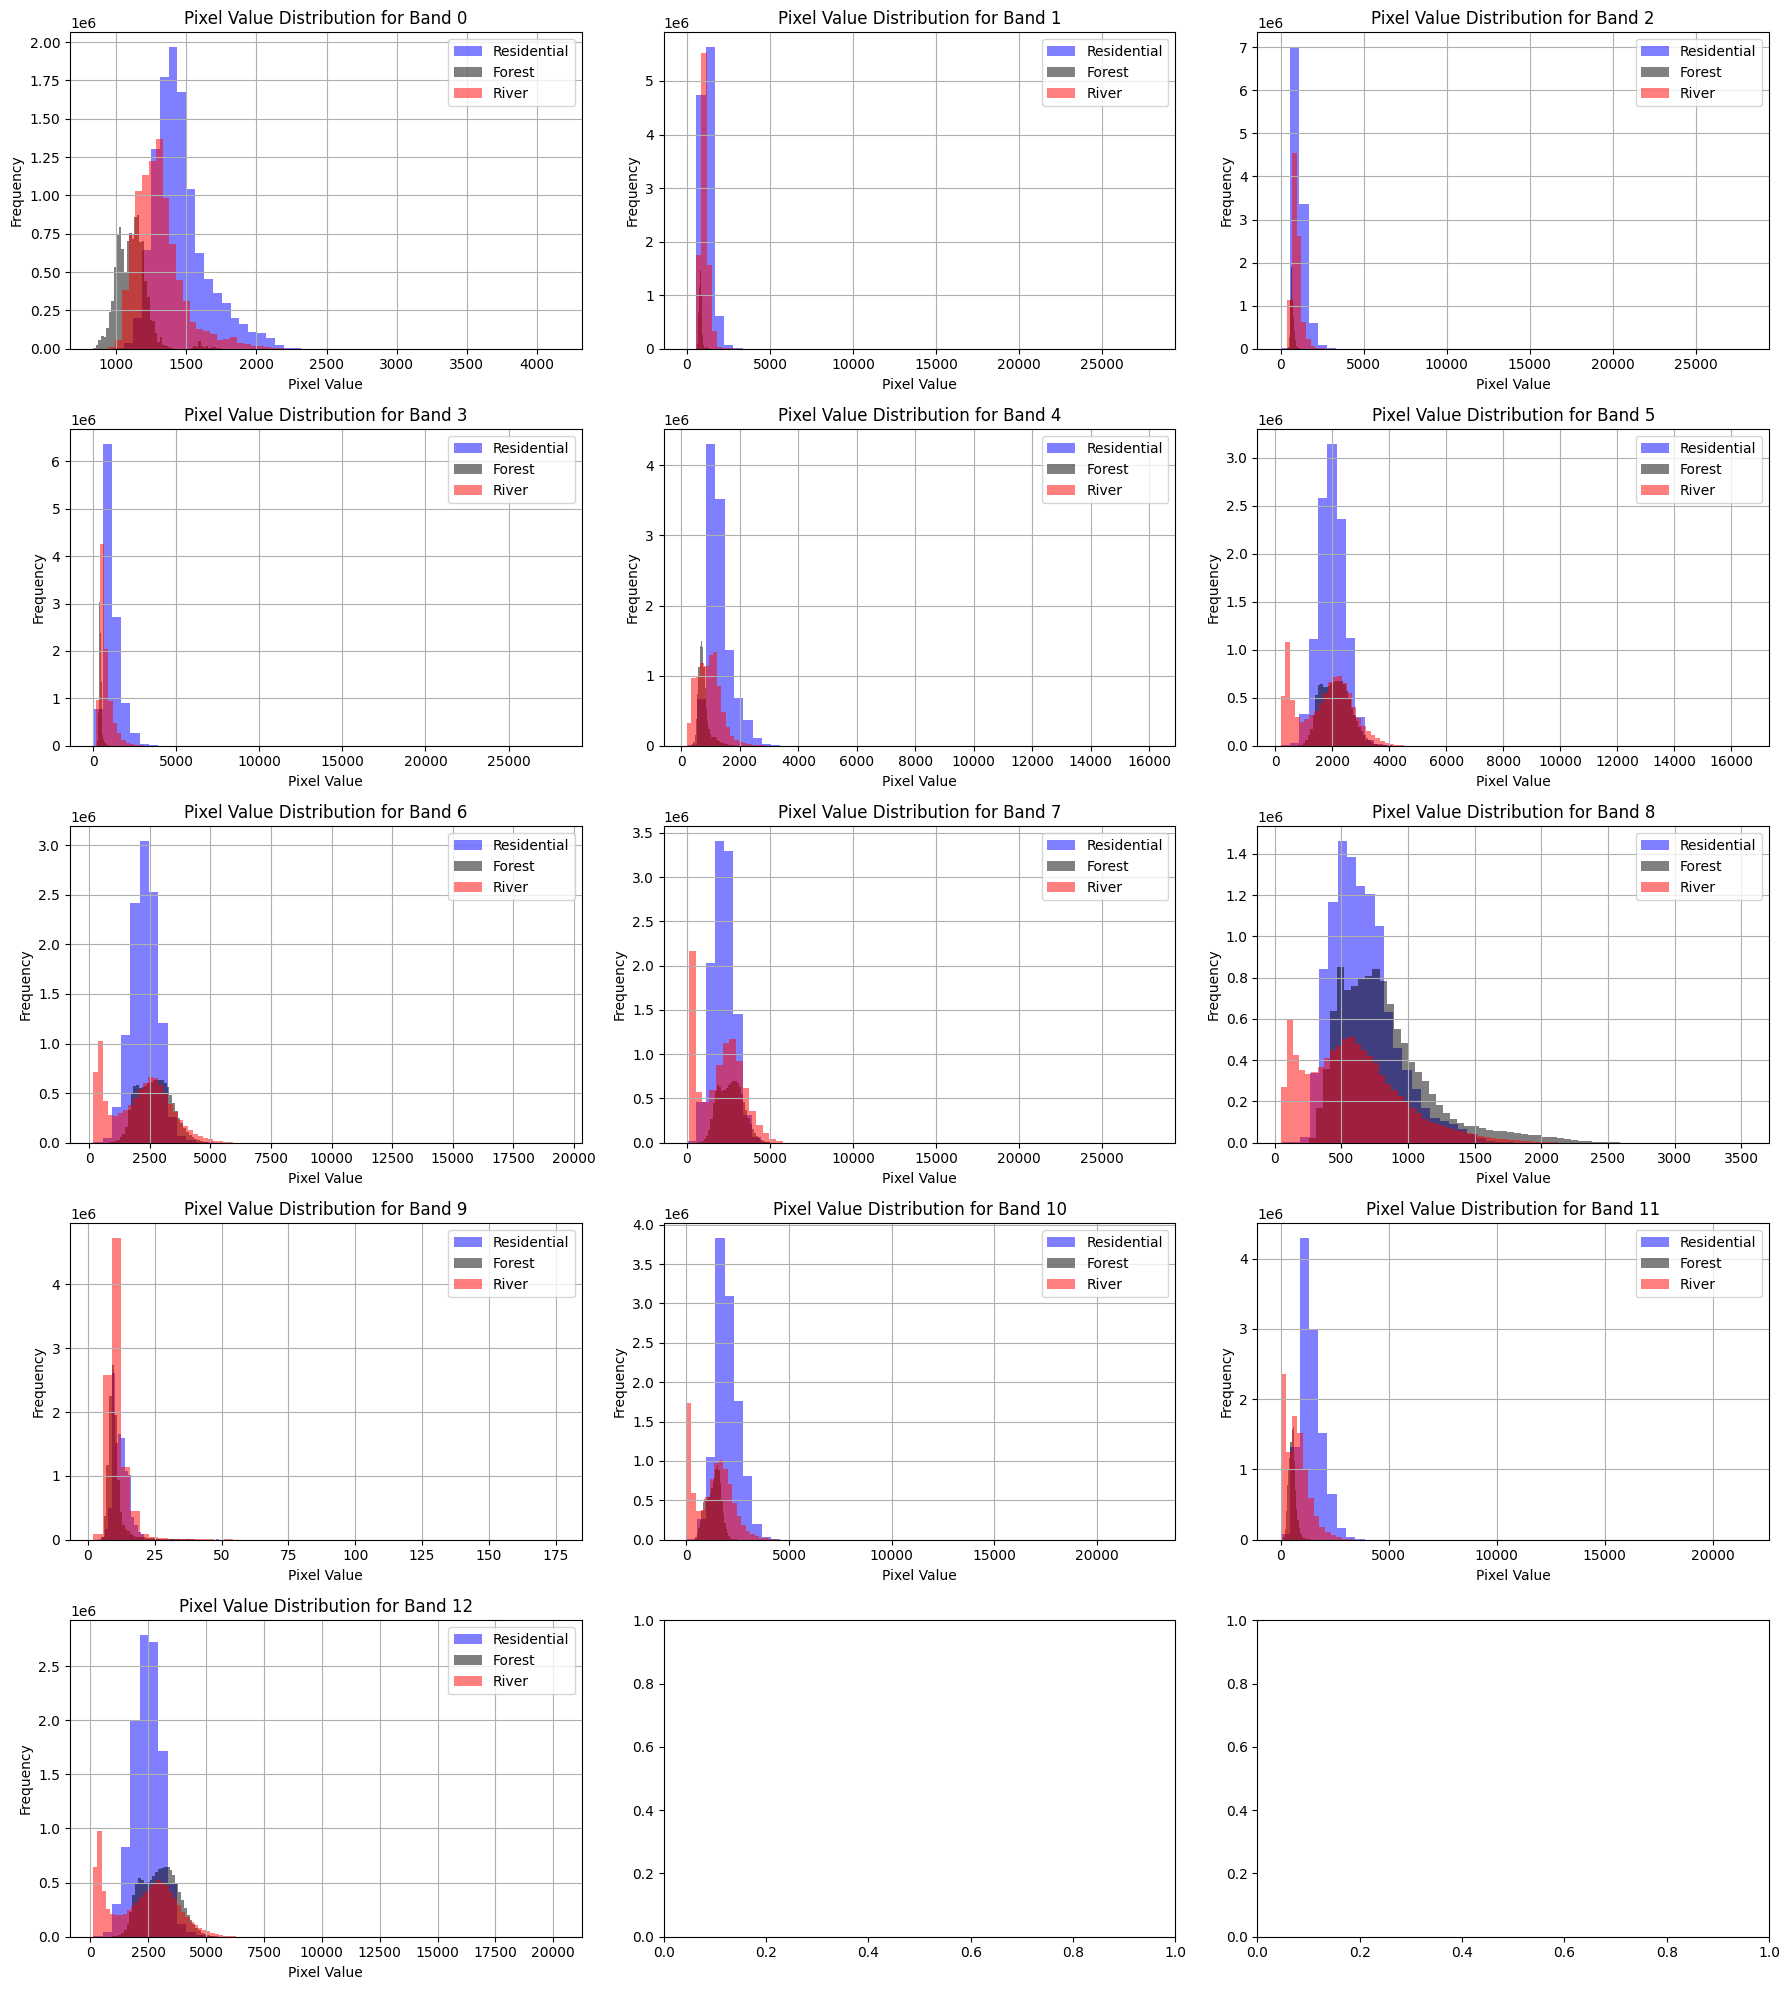

In [55]:
# Calculate the number of rows needed based on three plots per row
num_rows = (num_bands + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4*num_rows))

# Iterate over each band
for band_idx in range(num_bands):
    # Extract pixel values for the current band for each class
    residential_band_values = residential_images_train[:, :, :, band_idx]
    forest_band_values = forest_images_train[:, :, :, band_idx]
    river_band_values = river_images_train[:, :, :, band_idx]
    
    # Determine the subplot position
    row_idx = band_idx // 3
    col_idx = band_idx % 3
    
    # Plot the pixel values for the current band for each class
    axes[row_idx, col_idx].hist(residential_band_values.ravel(), bins=50, color='blue', alpha=0.5, label='Residential')
    axes[row_idx, col_idx].hist(forest_band_values.ravel(), bins=50, color='black', alpha=0.5, label='Forest')
    axes[row_idx, col_idx].hist(river_band_values.ravel(), bins=50, color='red', alpha=0.5, label='River')
    axes[row_idx, col_idx].set_xlabel('Pixel Value')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Pixel Value Distribution for Band {band_idx}')
    axes[row_idx, col_idx].grid(True)
    axes[row_idx, col_idx].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [60]:
# bands=[0,4,10,11,12] #0.90
# bands=[0,4,10,12]  #0.86
# bands=[0,4,12] #0.83
# bands=[1,2,3] #RGB #0.70
# bands=[0] #RGB #0.65
# bands=[8] #RGB #0.47

bands_mask=np.zeros(num_bands,dtype=bool)
bands_mask[bands]=True
print("bands_mask",bands_mask)

bands_mask [False False False False False False False False  True False False False
 False]


### MLE

In [61]:
# Step(1) Cal class Priors
p_residential = len(residential_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))
p_forest = len(forest_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))
p_river = len(river_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))

print("--------Class Priors---------")
print(f'P(Residential) = {p_residential:.2f}')
print(f'P(Forest) = {p_forest:.2f}')
print(f'P(River) = {p_river:.2f}')

# Step(2) Calculate the mean and standard deviation for each feature for each class
print("\n---------Class Mean & Covariance Matrix----------")
# Compute Mean
mean_residential = np.mean(residential_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
print("Residential Mean: ", mean_residential)
# Compute Covariance Matrix
covariance_matrix_residential = np.cov(residential_images_train[:,:,:,bands_mask].reshape(-1,residential_images_train[:,:,:,bands_mask].shape[-1]), rowvar=False)
print("Residential Covariance Matrix:\n", covariance_matrix_residential)


# Compute Mean
mean_forest = np.mean(forest_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
print("Forest Mean: ", mean_forest)
# Compute Covariance Matrix
covariance_matrix_forest = np.cov(forest_images_train[:,:,:,bands_mask].reshape(-1,forest_images_train[:,:,:,bands_mask].shape[-1]), rowvar=False)
print("Forest Covariance Matrix:\n", covariance_matrix_forest)


# Compute Mean
mean_river = np.mean(river_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
print("River Mean: ", mean_river)
# Compute Covariance Matrix
covariance_matrix_river = np.cov(river_images_train[:,:,:,bands_mask].reshape(-1,river_images_train[:,:,:,bands_mask].shape[-1]), rowvar=False)
print("River Covariance Matrix:\n", covariance_matrix_river)

--------Class Priors---------
P(Residential) = 0.35
P(Forest) = 0.35
P(River) = 0.29

---------Class Mean & Covariance Matrix----------
Residential Mean:  [664.42014061]
Residential Covariance Matrix:
 57563.366457345466
Forest Mean:  [826.21561026]
Forest Covariance Matrix:
 126686.57117222414
River Mean:  [597.78597873]
River Covariance Matrix:
 132357.06606393622


In [62]:
from scipy.stats import multivariate_normal
images_test=np.vstack([residential_images_test[:,:,:,bands_mask],forest_images_test[:,:,:,bands_mask],river_images_test[:,:,:,bands_mask]])
labels_test=np.hstack([np.zeros(len(residential_images_test)),np.ones(len(forest_images_test)),2*np.ones(len(river_images_test))])

# Step(3) Calculate the likelihood of the test data for each class
print("\n---------Likelihood of Test Data----------")

likelihood_residential = multivariate_normal.pdf(images_test.reshape(-1,np.sum(bands_mask)), mean=mean_residential, cov=covariance_matrix_residential)
posterior_residential=p_residential*likelihood_residential


likelihood_forest = multivariate_normal.pdf(images_test.reshape(-1,np.sum(bands_mask)), mean=mean_forest, cov=covariance_matrix_forest)
posterior_forest=p_forest*likelihood_forest


likelihood_river = multivariate_normal.pdf(images_test.reshape(-1,np.sum(bands_mask)), mean=mean_river, cov=covariance_matrix_river)
posterior_river=p_river*likelihood_river


#  Step (4) Predict class
predicted_class = np.argmax(np.vstack([posterior_residential, posterior_forest, posterior_river]), axis=0)
predicted_class=predicted_class.reshape(images_test.shape[0],-1) # Reshape Back to Examples
print(predicted_class.shape)

#  Predict Class of the image by majority voting
# Find the class label with the highest count
most_frequent_label =  np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predicted_class)


---------Likelihood of Test Data----------
(850, 4096)


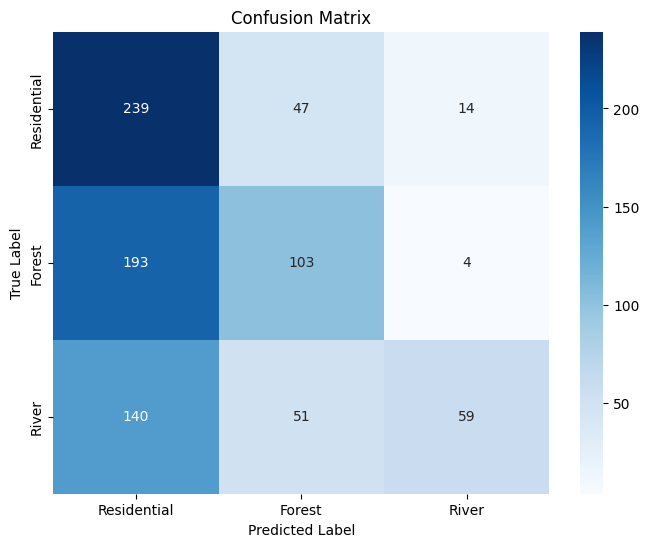

Accuracy: 0.47


In [63]:
# Draw the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_test, most_frequent_label)
# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Residential', 'Forest', 'River'], columns=['Residential', 'Forest', 'River'])
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Compute the accuracy
accuracy = np.mean(most_frequent_label == labels_test)
print(f'Accuracy: {accuracy:.2f}')

### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (2 Marks)**
   - Correctly loads images for the residential, river, and forest classes. (0.5 Marks)
   - Accurately splits the dataset into training and testing subsets and clearly shows this split. (1.5 Marks)

2. **Feature Extraction (2 Marks)**
   - Implements feature extraction appropriately, considering the curse of dimensionality. (1 Mark)
   - Extracts and justifies the selection of features relevant to distinguishing the classes. (1 Mark)

3. **Implementation of MLE Classifier (3 Marks)**
   - Correctly calculates and clearly shows class priors and class-specific parameters. (1 Mark)
   - Accurately computes likelihoods using the likelihood equation (probability density function) and classifies based on maximum likelihood. Must clearly show these calculations and explain the choice of likelihood equation. (2 Marks)

4. **Model Evaluation and Understanding (3 Marks)**
   - Shows **confusion matrix** and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score. (1 Mark)
   - **Comparison amongst your peers.** Compares the model's performance against those of peers to identify strengths and areas for improvement. (2 Marks)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
